# Manpreet Dhindsa, Ahmed Bahyal - COMP 542 - Income Prediction

In [1]:
# Load data using Pandas
import pandas as pd
import os
def load_adult_data(path=r"C:\repos\COMP_542\dataset"):
    csv_path = os.path.join(path, "adult.csv")
    return pd.read_csv(csv_path)
adult = load_adult_data()

In [2]:
# a) How many tuples does the adult data set have? (Check out the data frame)
num_tuples, num_columns = adult.shape
print("Number of tuples (rows) in the adult dataset:", num_tuples)

Number of tuples (rows) in the adult dataset: 32561


In [3]:
# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education_num                13
marital_status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital_gain               2174
capital_loss                  0
hours_per_week               40
native_country    United-States
target                    <=50K
Name: 0, dtype: object


In [4]:
# b) How many features does the adult data set have? Print a name list.
feature_names = adult.columns[:-1] 
print("Number of features in the adult dataset: " + str(len(feature_names)))
print("Features in the adult dataset: " + str(feature_names.to_list()))

Number of features in the adult dataset: 14
Features in the adult dataset: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']


In [5]:
# c) What’s the data type for each feature?
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# d) How many of each target do you have?
print("Count of each target in the adult dataset: " + str(adult['target'].value_counts()))

Count of each target in the adult dataset: target
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [7]:
# e) What’s the mean, median, quantiles and range (max-min)?
numeric_columns = adult[['age', 'capital_gain', 'capital_loss', 'hours_per_week']]
measurements = numeric_columns.describe()
ranges = numeric_columns.max() - numeric_columns.min()
medians = numeric_columns.median()
measurements.loc['range'] = ranges
measurements.loc['median'] = medians
print(measurements)

                 age  capital_gain  capital_loss  hours_per_week
count   32561.000000  32561.000000  32561.000000    32561.000000
mean       38.581647   1077.648844     87.303830       40.437456
std        13.640433   7385.292085    402.960219       12.347429
min        17.000000      0.000000      0.000000        1.000000
25%        28.000000      0.000000      0.000000       40.000000
50%        37.000000      0.000000      0.000000       40.000000
75%        48.000000      0.000000      0.000000       45.000000
max        90.000000  99999.000000   4356.000000       99.000000
range      73.000000  99999.000000   4356.000000       98.000000
median     37.000000      0.000000      0.000000       40.000000


<Axes: xlabel='education_num', ylabel='hours_per_week'>

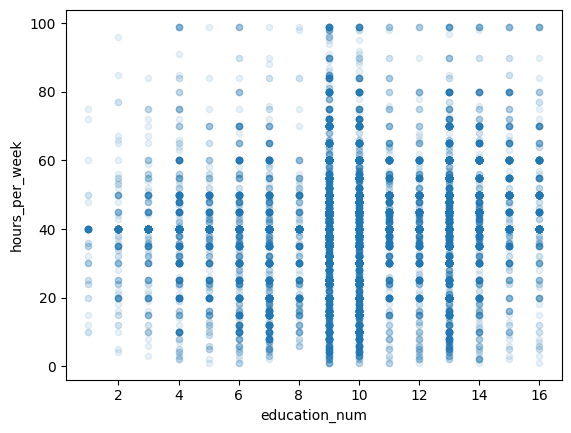

In [8]:
# f) Make a scatter plot of education_num vs hours_per_week.
adult.plot(kind="scatter", x="education_num", y="hours_per_week", alpha=0.1)

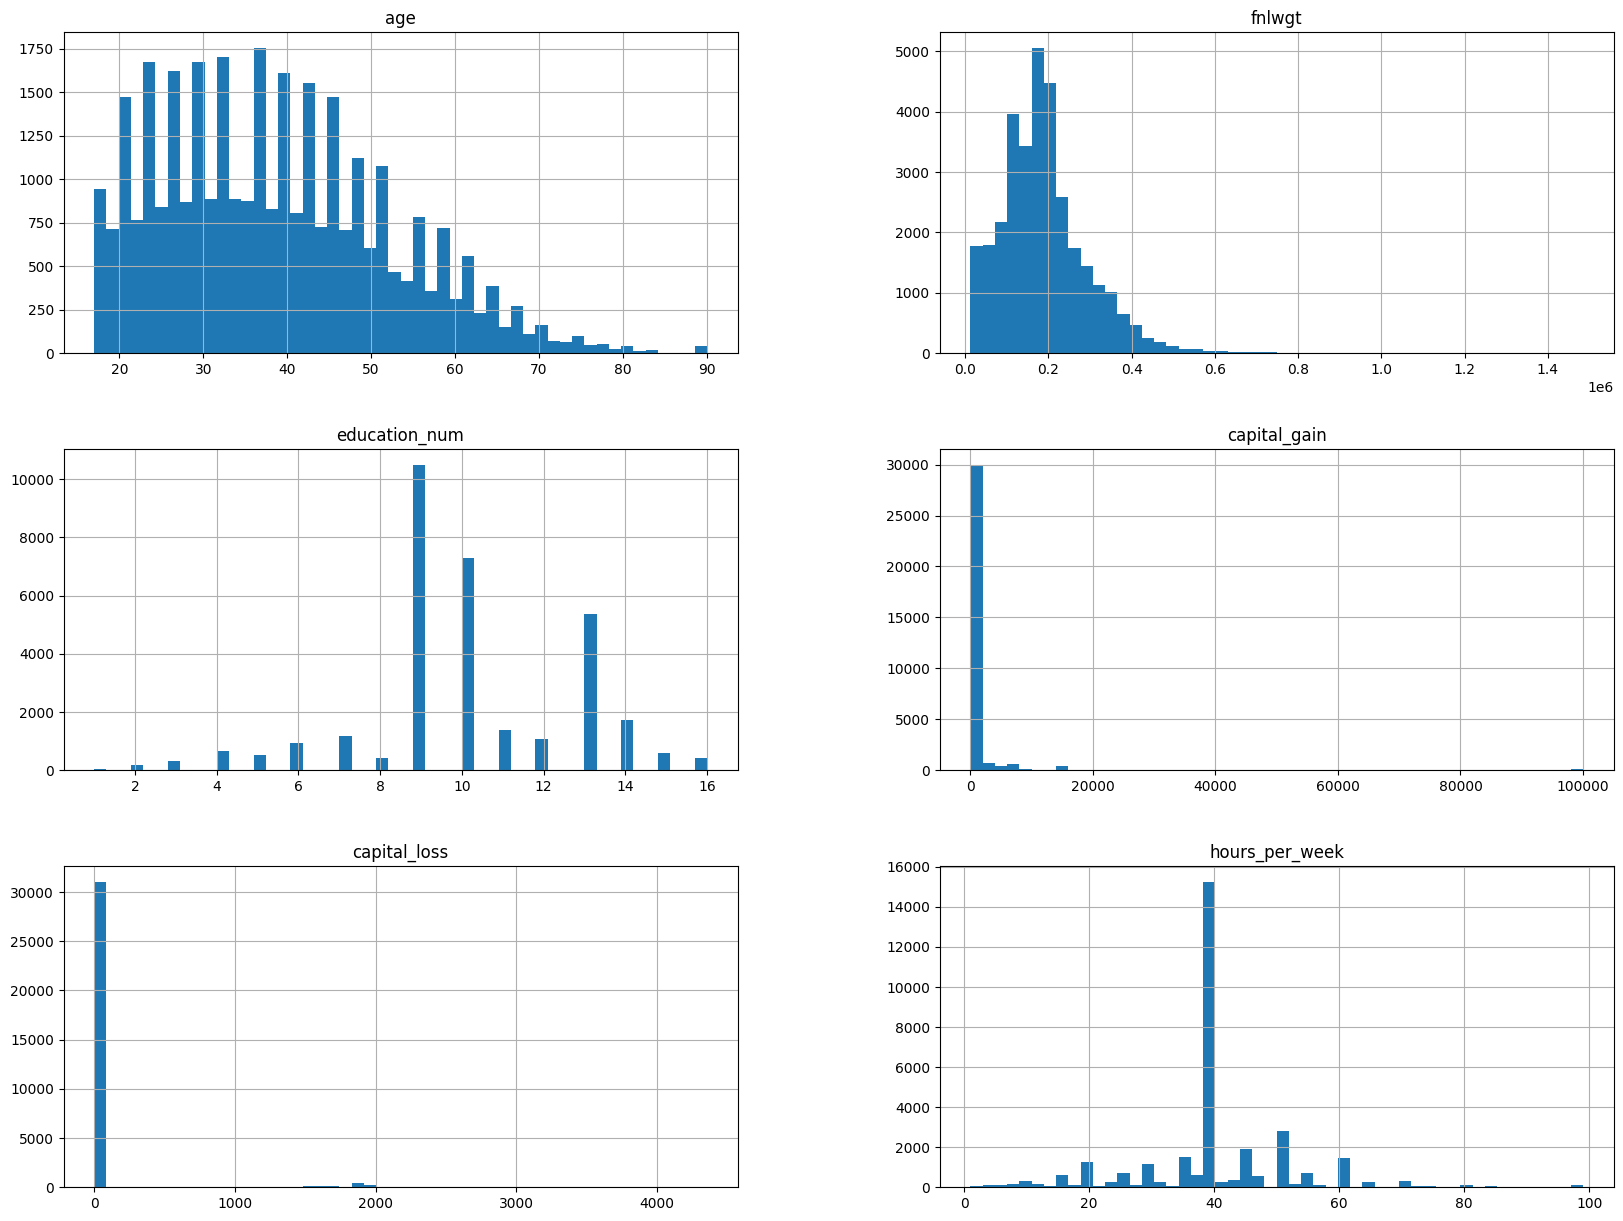

In [9]:
# g) Create individual histogram plots in a single figure, where each plot contains one numberical feature.
%matplotlib inline 
import matplotlib.pyplot as plt
adult.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: title={'center': 'hours_per_week'}, xlabel='target'>

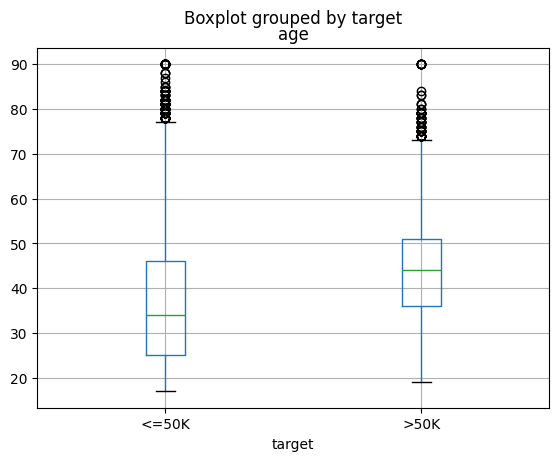

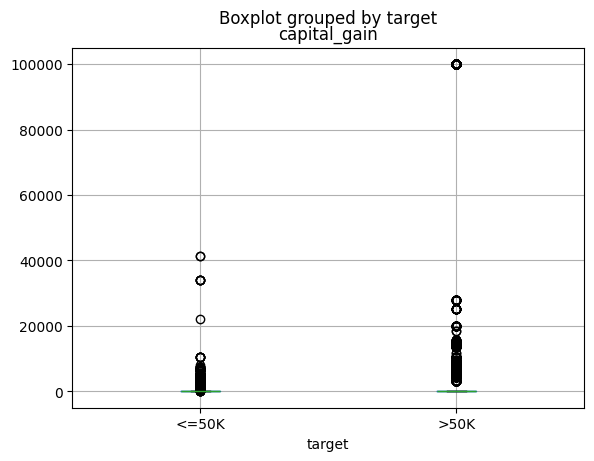

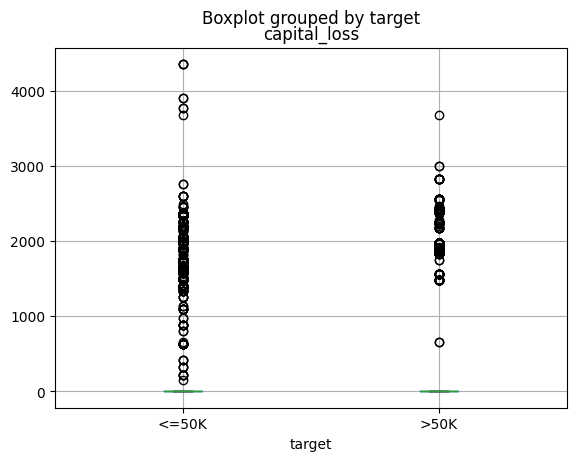

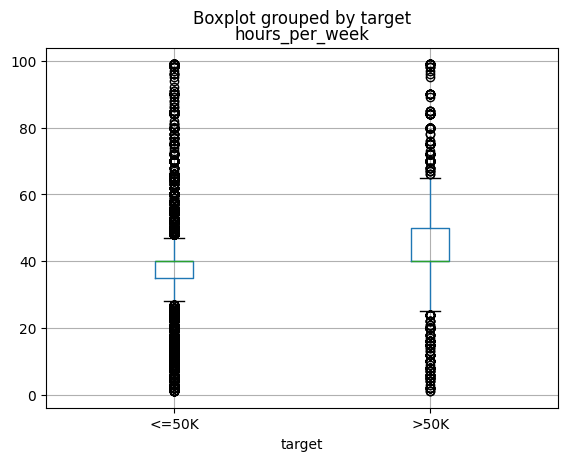

In [10]:
# h) Create four individual boxplots in a single figure, where each plot contains one feature.
adult.boxplot(column='age', by='target')
adult.boxplot(column='capital_gain', by='target')
adult.boxplot(column='capital_loss', by='target')
adult.boxplot(column='hours_per_week', by='target')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hours_per_week', ylabel='age'>,
        <Axes: xlabel='capital_gain', ylabel='age'>,
        <Axes: xlabel='capital_loss', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='hours_per_week'>,
        <Axes: xlabel='hours_per_week', ylabel='hours_per_week'>,
        <Axes: xlabel='capital_gain', ylabel='hours_per_week'>,
        <Axes: xlabel='capital_loss', ylabel='hours_per_week'>],
       [<Axes: xlabel='age', ylabel='capital_gain'>,
        <Axes: xlabel='hours_per_week', ylabel='capital_gain'>,
        <Axes: xlabel='capital_gain', ylabel='capital_gain'>,
        <Axes: xlabel='capital_loss', ylabel='capital_gain'>],
       [<Axes: xlabel='age', ylabel='capital_loss'>,
        <Axes: xlabel='hours_per_week', ylabel='capital_loss'>,
        <Axes: xlabel='capital_gain', ylabel='capital_loss'>,
        <Axes: xlabel='capital_loss', ylabel='capital_loss'>]],
      dtype=object)

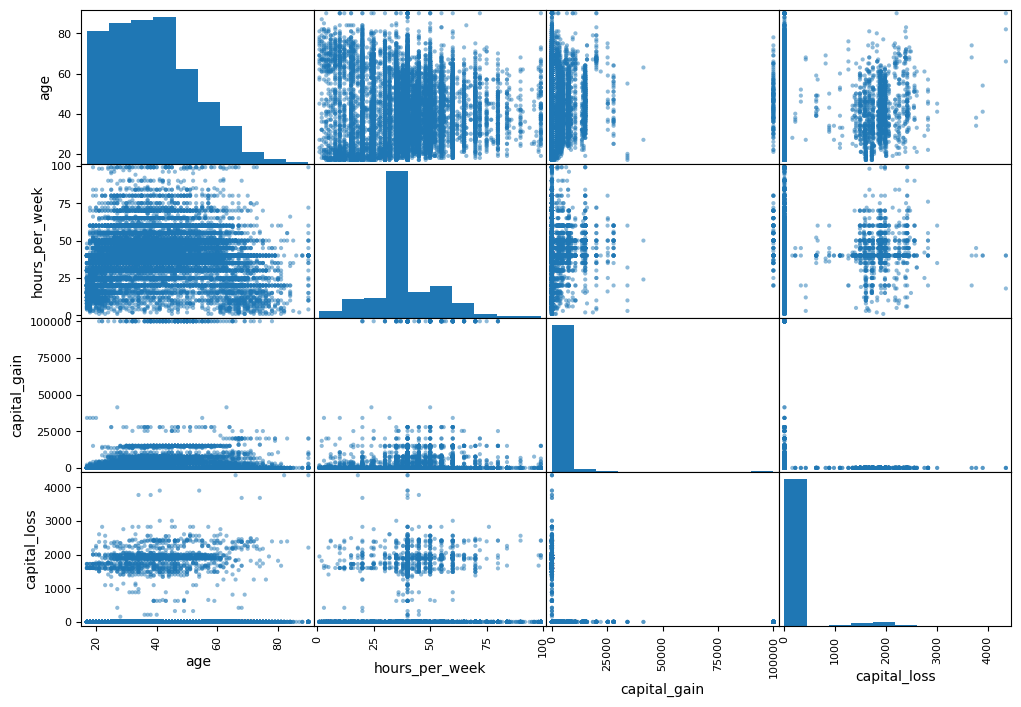

In [11]:
# i) Make a scatter plot matrix to examine the correlations
import pandas
from pandas.plotting import scatter_matrix
attributes = ["age", "hours_per_week", "capital_gain", "capital_loss"]
scatter_matrix(adult[attributes], figsize=(12, 8))

In [12]:
missing_values = adult.isna().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


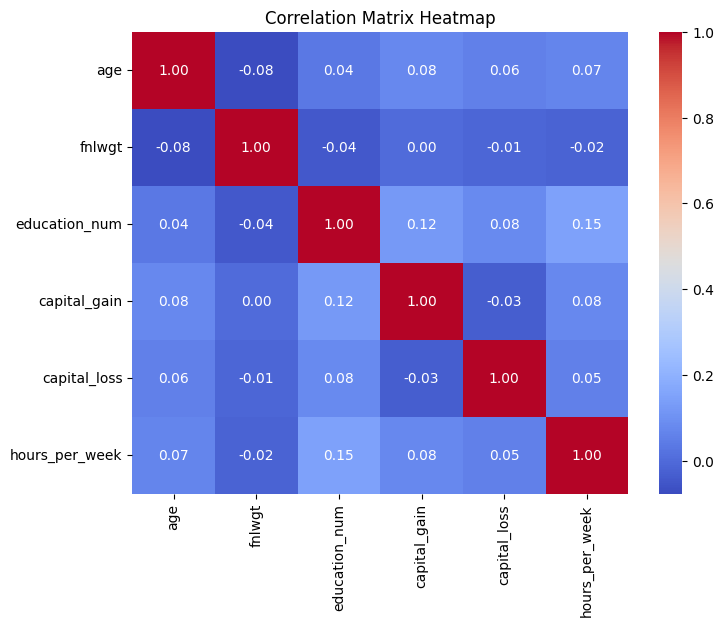

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numericla features
numeric_columns = adult.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


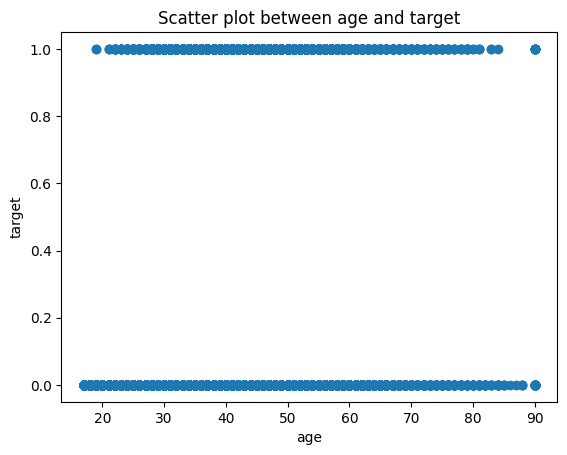

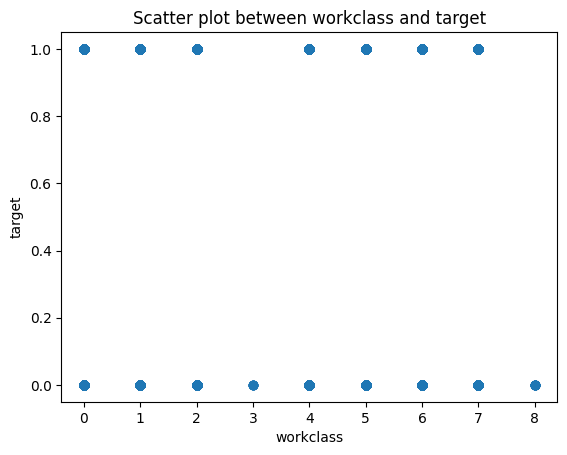

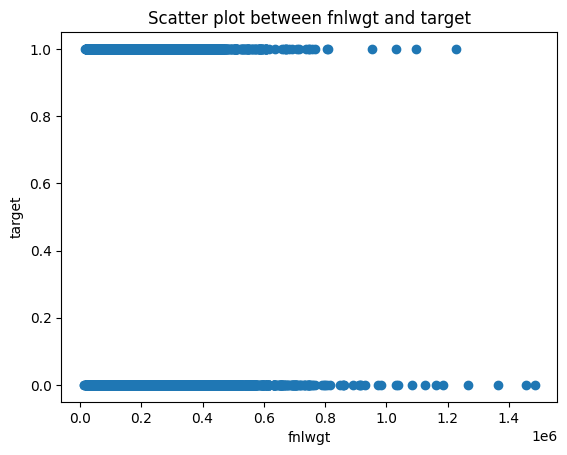

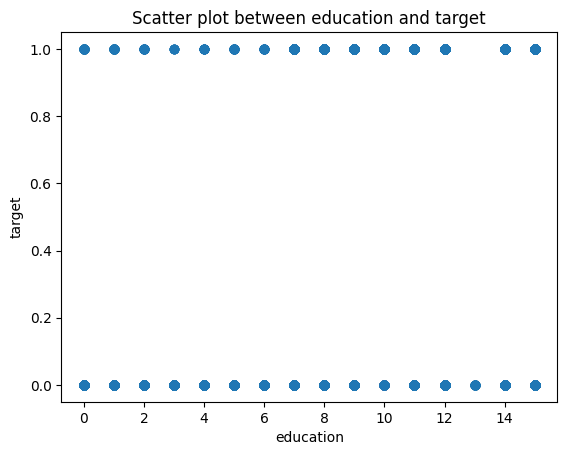

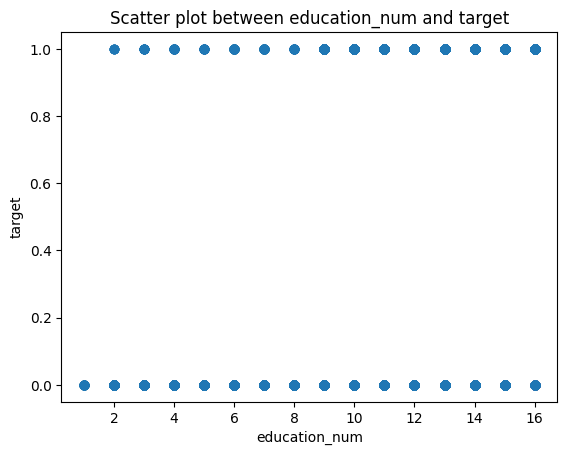

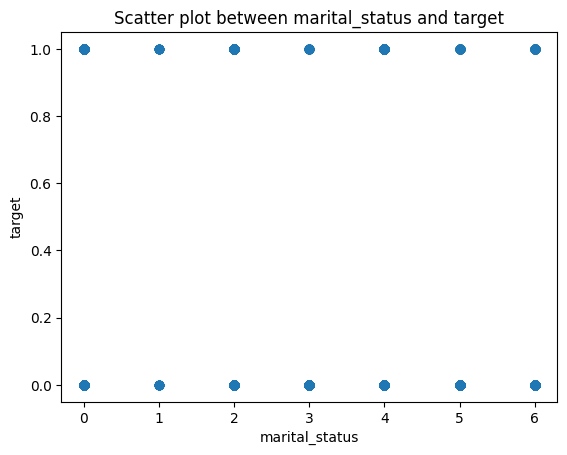

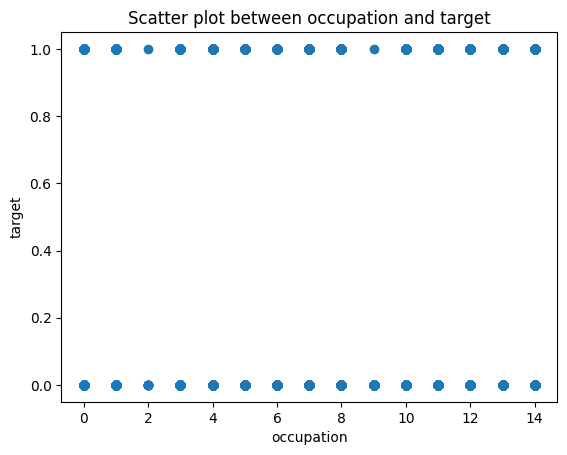

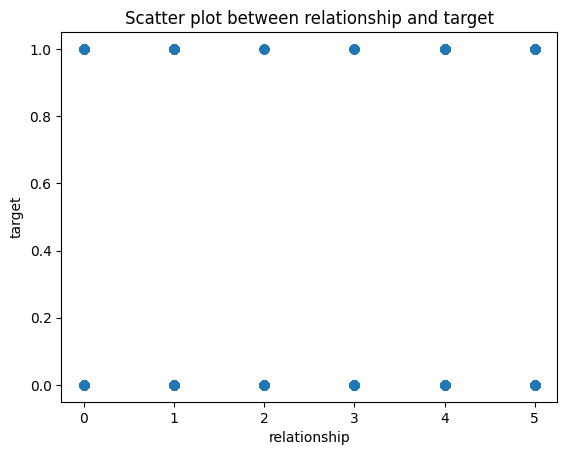

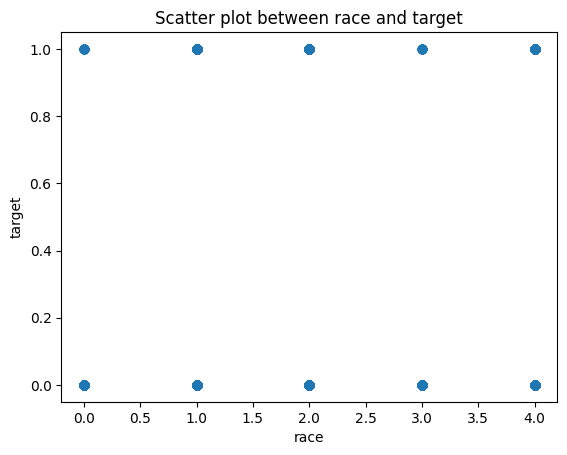

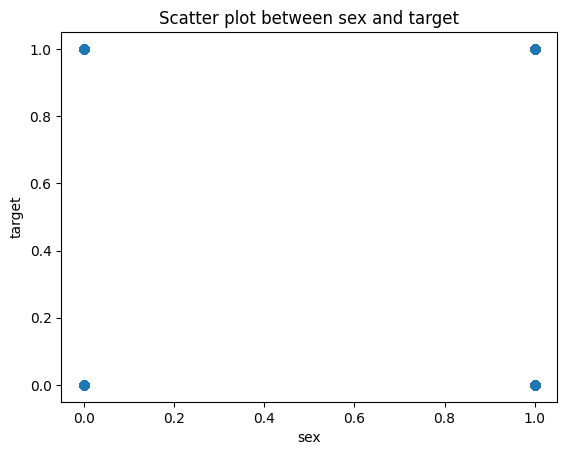

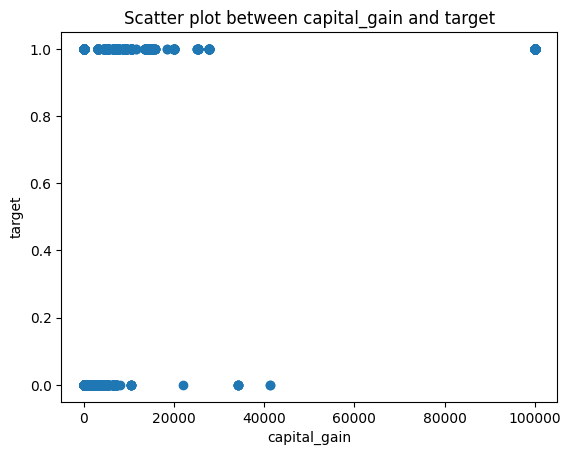

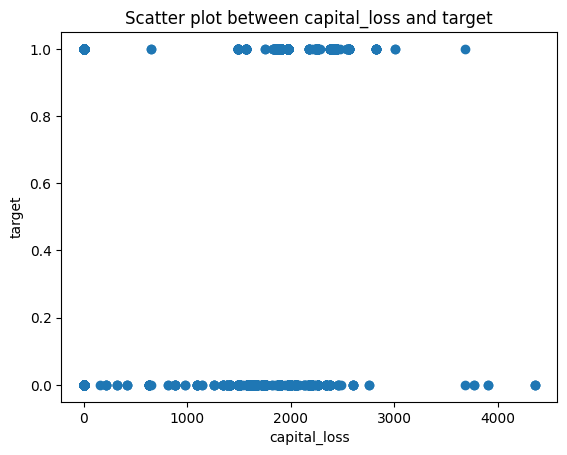

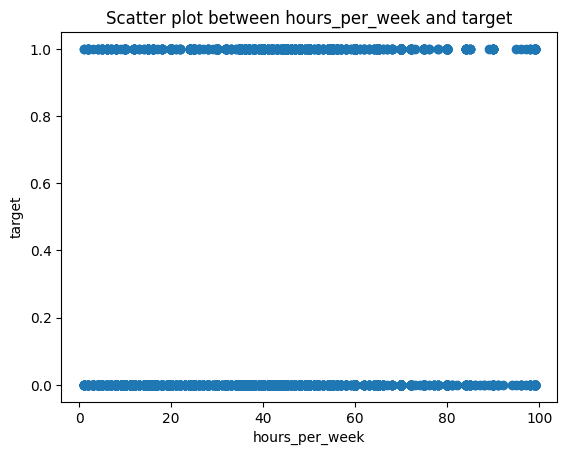

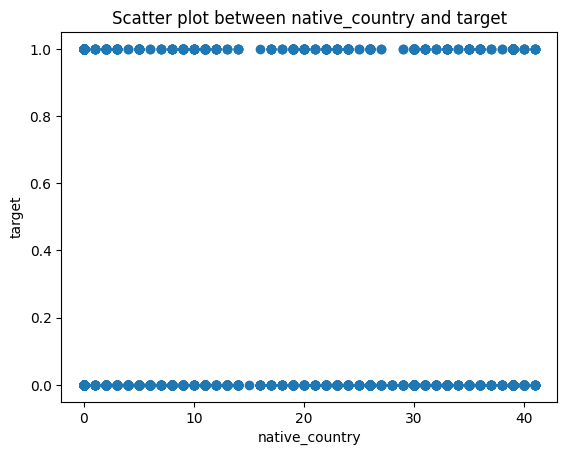

In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

correlations = adult.corr()
target_variable = 'target' 

for column in adult.columns:
    if column != target_variable:  # Skip plotting the target variable against itself
        plt.scatter(adult[column], adult[target_variable])
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatter plot between {column} and {target_variable}')
        plt.show()


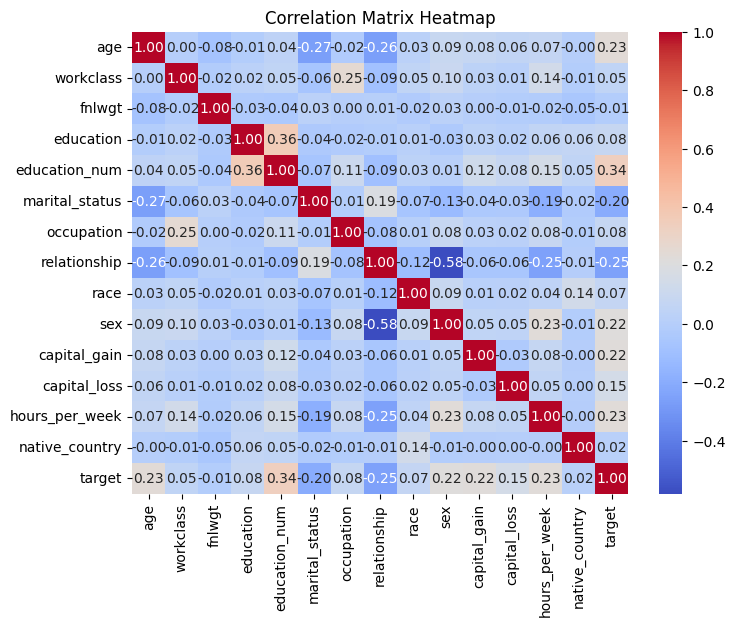

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

object_attributes = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "target"]

label_encoder = LabelEncoder()

for column in object_attributes:
    if column in adult.columns:
        adult[column] = label_encoder.fit_transform(adult[column])

# Calculate the correlation matrix
correlation_matrix = adult.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
# Feature Engineering, drop the attributes/columns that are not needed
print(adult.columns)

# Drop columns if they exist
columns_to_drop = ['native_country', 'fnlwgt']
if all(col in adult.columns for col in columns_to_drop):
    adult = adult.drop(columns_to_drop, axis=1)
else:
    print("Columns not found in the DataFrame.")

print(adult.columns)

# Grab one row/tuple
first_row = adult.iloc[0]
print(first_row)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')
Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')
age                 39
workclass            7
education            9
education_num       13
marital_status       4
occupation           1
relationship         1
race                 4
sex                  1
capital_gain      2174
capital_loss         0
hours_per_week      40
target               0
Name: 0, dtype: int64


In [17]:
# Idea from professor - Check if the dataset is imbalanced, resolve this issue
target_counts = adult['target'].value_counts()
print(target_counts)

target
0    24720
1     7841
Name: count, dtype: int64


In [18]:
# Random Oversampling - Fixes the imbalance
import pandas as pd
from sklearn.utils import resample

# Separate the two classes
df_less_than_50k = adult[adult['target'] == 0]
df_greater_than_50k = adult[adult['target'] == 1]

# Oversample the ">50K" class
df_greater_than_50k_oversampled = resample(df_greater_than_50k, 
                                           replace=True, 
                                           n_samples=len(df_less_than_50k),
                                           random_state=42) 

# Concatenate the oversampled ">50K" class with the "<=50K" class
adult_balanced = pd.concat([df_less_than_50k, df_greater_than_50k_oversampled])

# Verify the new fixed df
target_counts = adult_balanced['target'].value_counts()
print(target_counts)


target
0    24720
1    24720
Name: count, dtype: int64


0.7653721682847896


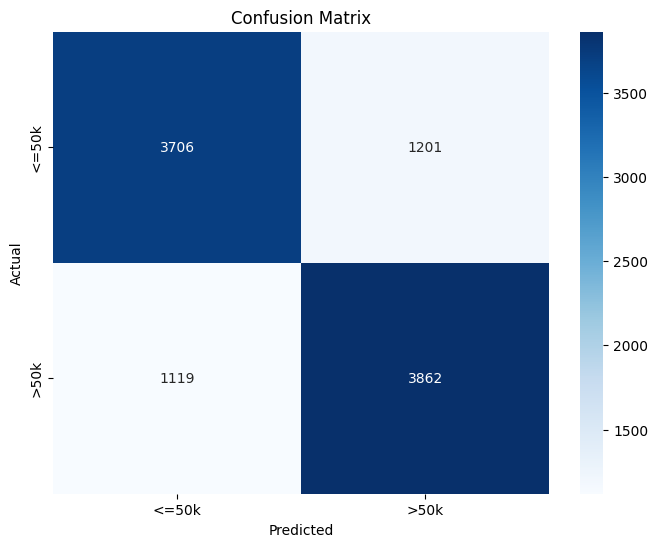

In [24]:
# Training with LinearSVC

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge', C=1, dual='auto', max_iter=50000, random_state=42))
])

# Training the model
svm_clf.fit(X_train, y_train)

# Predicting using the model
y_pred = svm_clf.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

0.8260517799352751


c:\Users\ab363356\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


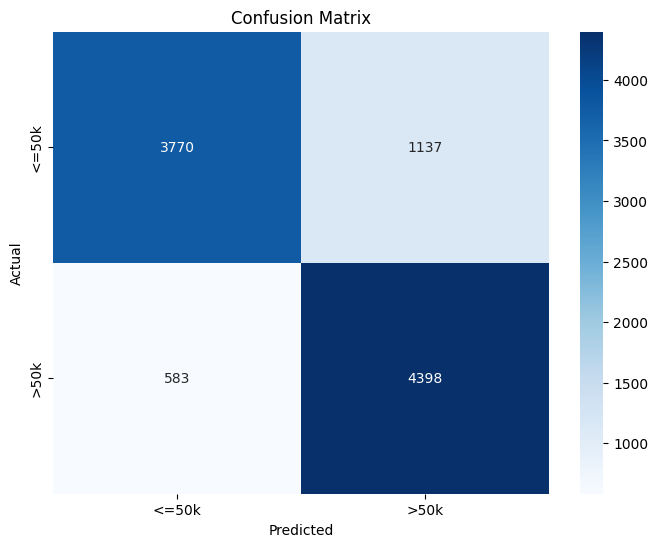

In [29]:
# Training LinearSVC with Polynomial Features, degree = 3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline
svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge', C=1, dual='auto', max_iter=50000, random_state=42))
])

# Training the model
svm_clf.fit(X_train, y_train)

# Predicting using the model
y_pred = svm_clf.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

0.8239279935275081


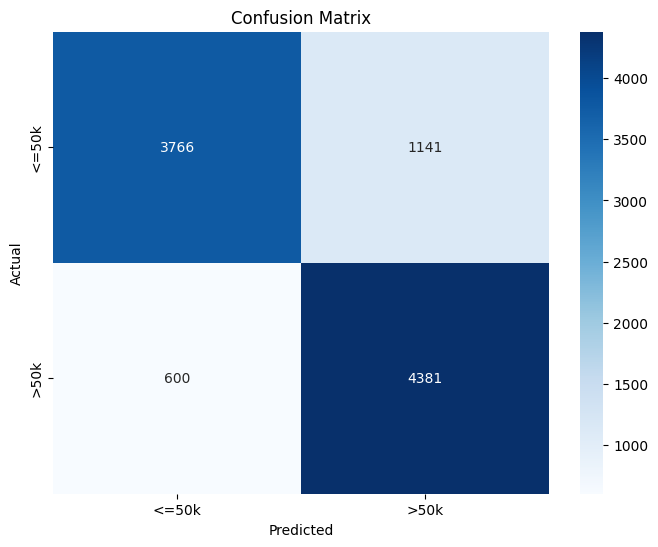

In [26]:
# Polynomial Kernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='poly', degree = 3, coef0= 1, C = 10, random_state=42))
            ])

# Training the model
svm_clf.fit(X_train, y_train)

# Predicting using the model
y_pred = svm_clf.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Confusion matrix to calculate specificity
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best hyparameters are {'svm_clf__C': 10, 'svm_clf__gamma': 10}
0.916970064724919


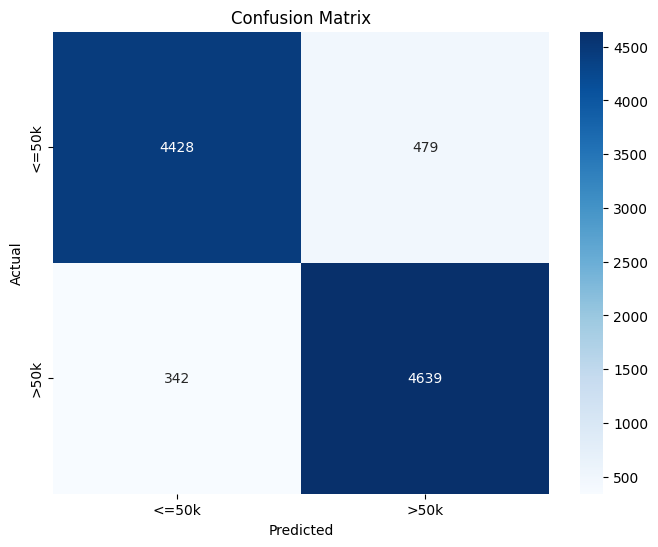

In [31]:
# Training RBF Kernel using best paramters found from GridSearch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the RBF Kernel - SVM classifier
svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='rbf'))
            ])

# Defining hyperparameter values to be used in GridSearch
param_grid = {
    'svm_clf__C': [0.001, 0.01, 0.1, 1, 10],
    'svm_clf__gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Defining the GridSearch
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyparameters are", best_params)

# Finding the best model and predicting on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best hyparameters are {'svm_clf__C': 10, 'svm_clf__gamma': 1000}
0.9349716828478964


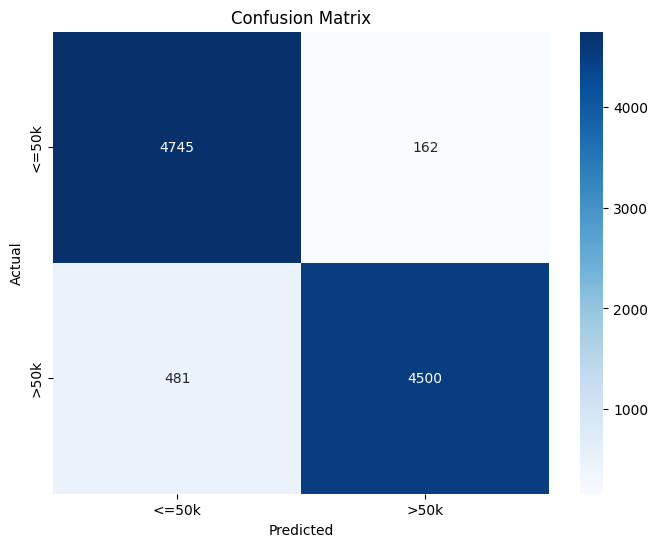

In [21]:
# Expanding the parameter grid to include other values for hyperparamters - 100, 1000 for both gamma and C
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Setting up the RBF Kernel - SVM classifier
svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='rbf'))
            ])

# Defining hyperparameter values to be used in GridSearch
param_grid = {
    'svm_clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'svm_clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Defining the GridSearch
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyparameters are", best_params)

# Finding the best model and predicting on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

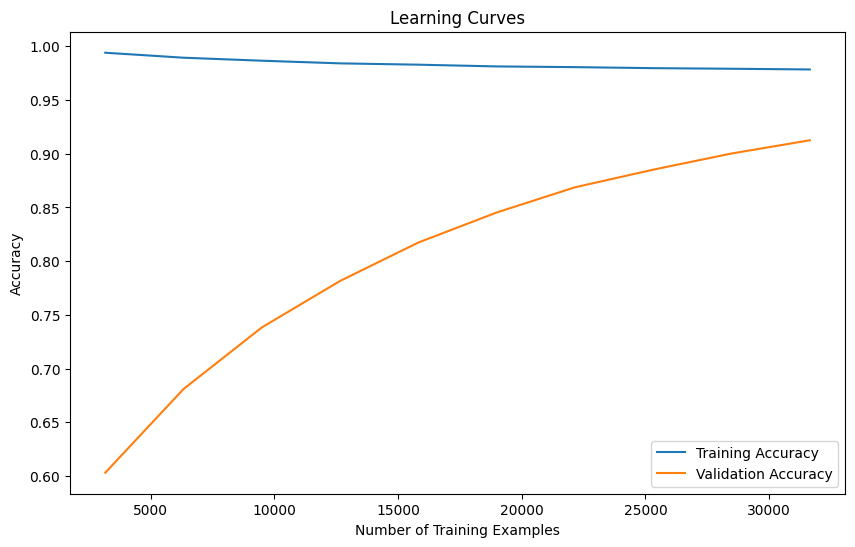

In [22]:
# Verify overfitting - plot learning curve
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Setting up the RBF Kernel - SVM classifier
svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='rbf', gamma = 1000, C = 10))
            ])

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    svm_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


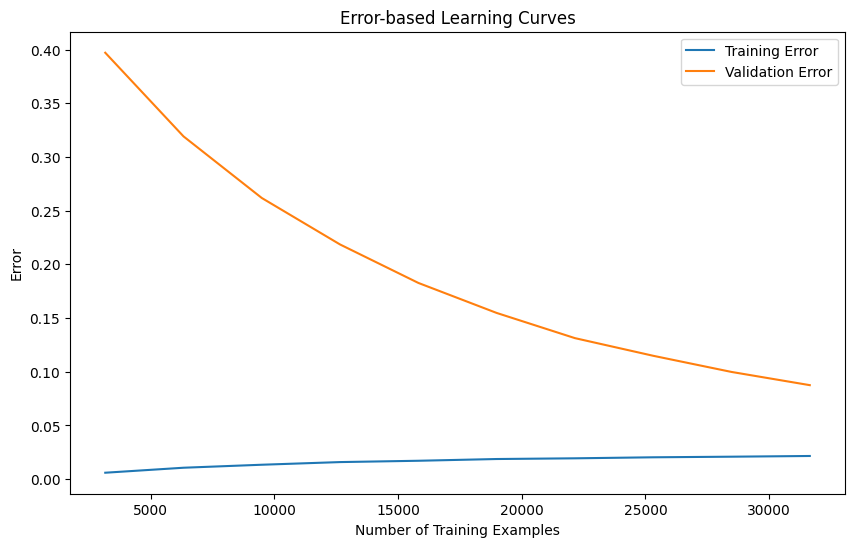

In [19]:
# Plotting Error/Loss curve 
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

class_names = ['<=50k', '>50k'] 

# Assuming adult_balanced is a pre-loaded DataFrame
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']



imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Setting up the RBF Kernel - SVM classifier
svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='rbf', gamma=1000, C=10))
            ])

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    svm_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean error rates instead of accuracy
train_errors_mean = np.mean(1 - train_scores, axis=1)
val_errors_mean = np.mean(1 - val_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, label='Training Error')
plt.plot(train_sizes, val_errors_mean, label='Validation Error')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.title('Error-based Learning Curves')
plt.show()


In [24]:
# Printing Evaluation metrics for our tuned model with gamma = 1000 and c = 10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = Pipeline([('scaler', StandardScaler()),
            ('svm_clf', SVC(kernel='rbf', gamma = 1000, C = 10))
            ])

# Training the model
svm_clf.fit(X_train, y_train)

# Predicting using the model
y_pred = svm_clf.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix to calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")


Accuracy: 0.9350
Precision: 0.9653
Recall (Sensitivity): 0.9034
F1 Score: 0.9333
Specificity: 0.9670


Accuracy: 0.9056432038834952


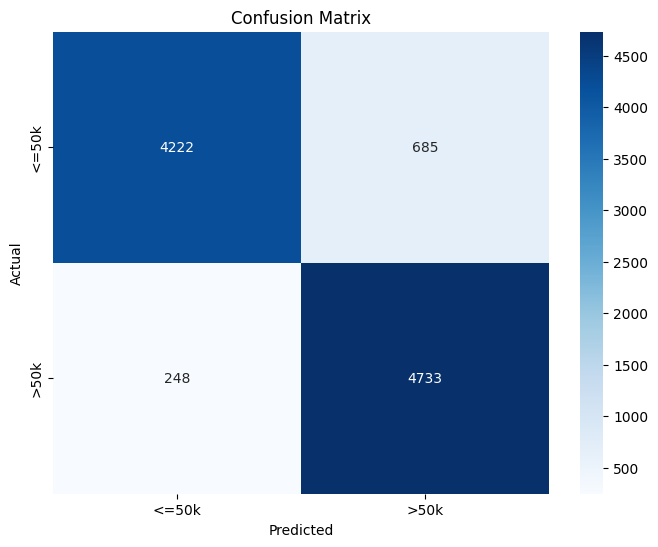

In [20]:
# Running DecisionTreeClassifier on dataset with default hyperparameters
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k']

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Training the model
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Use Grid Search to find the ideal criterion, max_depth and max_leaf_nodes. 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Create a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None}
0.9056432038834952


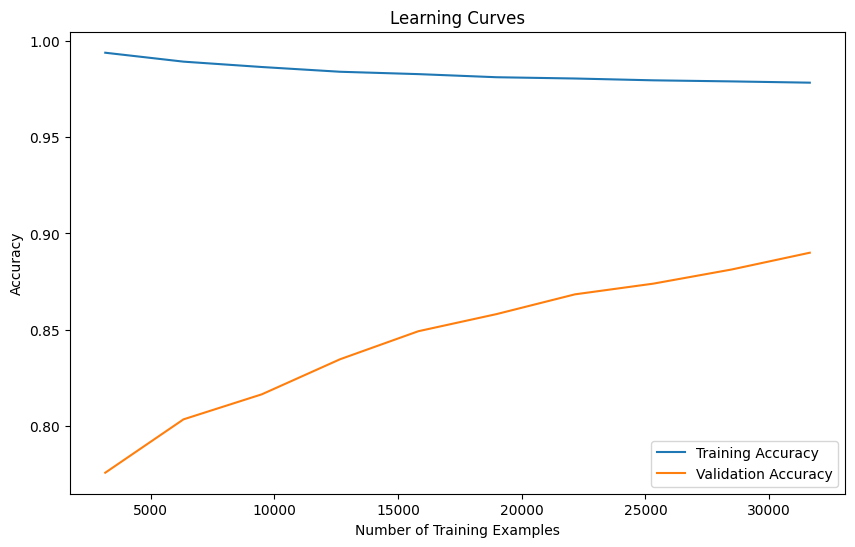

In [22]:
# Verify overfitting - Learning Curve for our tuned hyperparamters
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    tree_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

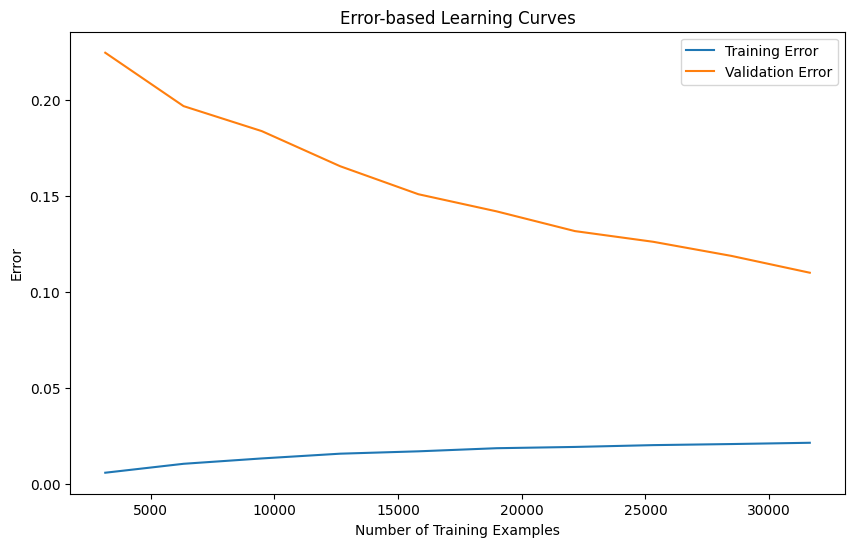

In [20]:
# Error/Loss curve for Decision Tree 
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    tree_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate mean error rates instead of accuracy
train_errors_mean = np.mean(1 - train_scores, axis=1)
val_errors_mean = np.mean(1 - val_scores, axis=1)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, label='Training Error')
plt.plot(train_sizes, val_errors_mean, label='Validation Error')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.legend()
plt.title('Error-based Learning Curves')
plt.show()

In [23]:
# Use Grid Search again to find the ideal min_samples_split and min_samples_leaf hyperparamters

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Measuring the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
0.9056432038834952


In [26]:
# Printing Evaluation metrics for the decision tree classifier using best overall parameters - in this case default
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class_names = ['<=50k', '>50k'] 

# Handle missing values in X using the mean
X = adult_balanced.drop('target', axis=1)
y = adult_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the model
tree_clf.fit(X_train, y_train)

# Predicting using the model
y_pred = tree_clf.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix to calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")


Accuracy: 0.9056
Precision: 0.8736
Recall (Sensitivity): 0.9502
F1 Score: 0.9103
Specificity: 0.8604
